#### 1. 请问该 Sobel 是求取 x 还是 y 方向的梯度;

求的是y方向的梯度。

#### 2. 请问求取另一方向的梯度应该采用什么模板;
```python
sobel = np.asarray([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])
```

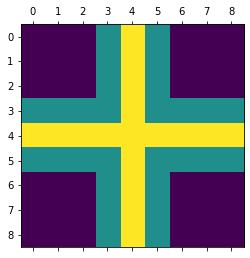

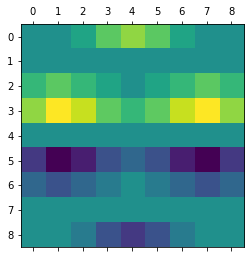

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

src_img = np.zeros([9, 9])
src_img[3:6, ...] = 127
src_img[..., 3:6] = 127
src_img[4, ...] = 255
src_img[..., 4] = 255

sobel_y = np.asarray([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
sobel_x = np.asarray([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])
dst_img = convolve2d(src_img, np.rot90(sobel_y, 2), 'same')

plt.matshow(src_img)
plt.matshow(dst_img)

#### 3. 求解 x 方向和 y 方向的梯度值;


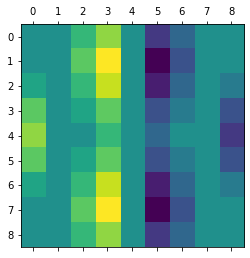

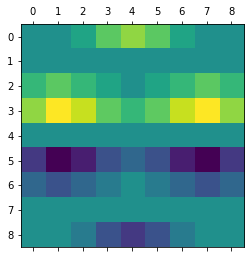

In [14]:

# dx, dy = np.gradient(src_img)
dy = convolve2d(src_img, np.rot90(sobel_y, 2), 'same')
dx = convolve2d(src_img, np.rot90(sobel_x, 2), 'same')

plt.matshow(dx)
plt.matshow(dy)

# cv2.Sobel(src_img,-1,dx,dy)

#### 4. 求解梯度的幅度值和方向。

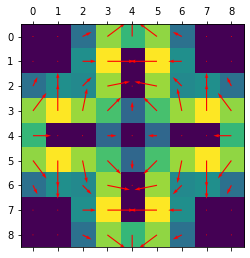

In [15]:
Im = np.sqrt(dx * dx + dy * dy)
plt.matshow(Im)

angle = np.arctan2(dy, dx)

# 边缘方向
# plt.quiver(-dx,dy,color='g',width=0.005)
# plt.quiver(dx,-dy,color='g',width=0.005)

# 梯度方向
plt.quiver(dx, dy, color='r', width=0.005)

#### 5. 请问离散化后的梯度方向是多少，离散化为(0, 𝜋/4 , 𝜋/2 , 3𝜋/4)。

离散化后方向:
[[0.         0.         0.78539816 0.78539816 1.57079633 2.35619449
  2.35619449 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.78539816 1.57079633 0.78539816 0.         0.         0.
  2.35619449 1.57079633 2.35619449]
 [0.78539816 1.57079633 1.57079633 0.78539816 1.57079633 2.35619449
  1.57079633 1.57079633 2.35619449]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [2.35619449 1.57079633 1.57079633 2.35619449 1.57079633 0.78539816
  1.57079633 1.57079633 0.78539816]
 [2.35619449 1.57079633 2.35619449 0.         0.         0.
  0.78539816 1.57079633 0.78539816]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         2.35619449 2.35619449 1.57079633 0.78539816
  0.78539816 0.         0.        ]]


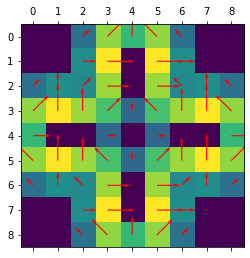

In [18]:
# plt.matshow(angle)
angle[angle < 0] = np.pi + angle[angle < 0]
angle[angle > 7 * np.pi / 8] = np.pi - angle[angle > 7 * np.pi / 8]

angle[(angle >= 0) & (angle < np.pi / 8)] = 0
angle[(angle >= np.pi / 8) & (angle < 3 * np.pi / 8)] = np.pi / 4
angle[(angle >= 3 * np.pi / 8) & (angle < 5 * np.pi / 8)] = np.pi / 2
angle[(angle >= 5 * np.pi / 8) & (angle < 7 * np.pi / 8)] = 3 * np.pi / 4

# plt.matshow(angle)
print("离散化后方向:\n{}".format(angle))
plt.matshow(Im)
plt.quiver(Im * np.cos(angle), Im * np.sin(angle), color='r', width=0.005)

#### 6. 请问沿着边缘方向经过抑制后的边缘值是多少。

沿边缘方向抑制后:
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [  0.           0.           0.         765.           0.
  765.           0.           0.           0.        ]
 [  0.           0.           0.         650.51748631   0.
  650.51748631   0.           0.           0.        ]
 [  0.         765.         650.51748631 541.64379439 256.
  541.64379439 650.51748631 765.           0.        ]
 [  0.           0.           0.         256.           0.
  256.           0.           0.           0.        ]
 [  0.         765.         650.51748631 541.64379439 256.
  541.64379439 650.51748631 765.           0.        ]
 [  0.           0.           0.         650.51748631   0.
  650.51748631   0.           0.           0.        ]
 [  0.           0.           0.         765.           0.
  765.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.

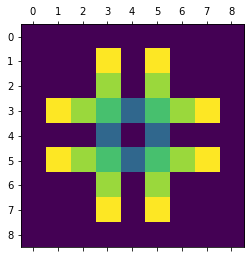

In [20]:
# 这里边缘的部分不好处理，所以忽略掉了

def non_maximum_suppression(magnitude, _angle):
    shape = magnitude.shape
    result = np.zeros(shape)
#
#   (i-1,j-1)  (  i,j-1)  (i+1.j-1)
#   (i-1,j  )  (  i,j  )  (i+1.j  )
#   (i-1,j+1)  (  i,j+1)  (i+1.j+1)
#
    for i in range(1, shape[0] - 1):
        for j in range(1, shape[1] - 1):
            g0 = magnitude[i, j]
            if _angle[i, j] == 0:
                if g0 >= magnitude[i, j + 1] and g0 >= magnitude[i, j - 1]:
                    result[i, j] = 1
                else:
                    result[i, j] = 0
            elif _angle[i, j] == np.pi / 4:
                if g0 >= magnitude[i + 1, j + 1] and g0 >= magnitude[i - 1, j - 1]:
                    result[i, j] = 1
                else:
                    result[i, j] = 0
            elif _angle[i, j] == np.pi / 2:
                if g0 >= magnitude[i + 1, j] and g0 >= magnitude[i - 1, j]:
                    result[i, j] = 1
                else:
                    result[i, j] = 0
            else:
                if g0 >= magnitude[i + 1, j - 1] and g0 >= magnitude[i - 1, j + 1]:
                    result[i, j] = 1
                else:
                    result[i, j] = 0
    return result


edge = non_maximum_suppression(Im, angle)
edge *= Im
print("沿边缘方向抑制后:\n{}".format(edge))
plt.matshow(edge)

